# Imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime

# Load Data

In [2]:
data = pd.read_csv(
    'data/20180820_Kaufland_case_IoT_and_predictive_maintenance.csv', sep=';', 
    dtype={'machine_name': np.str, 'sensor_type': np.str, 'date_measurement': np.str, 
           'start_timestamp': np.str, 'end_timestamp': np.str, 
           'realvalue': np.float64, 'unit': np.str}, 
    parse_dates=['date_measurement', 'start_timestamp', 'end_timestamp'])

In [3]:
data.head()

,machine_name,sensor_type,date_measurement,start_timestamp,end_timestamp,realvalue,unit
0,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:42,2016-09-02 15:26:42,0.395,mm/s
1,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:45,2016-09-02 15:26:45,0.577,mm/s
2,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:48,2016-09-02 15:26:48,0.717,mm/s
3,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:51,2016-09-02 15:26:51,0.832,mm/s
4,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:54,2016-09-02 15:26:54,0.941,mm/s


# Measurement Durations
The vast majority of measurements were instantaneous, i.e. 0 seconds long (higher resolution unavailable)

In [7]:
deltat = data.end_timestamp - data.start_timestamp
deltat_zero = deltat == datetime.timedelta(0)
print('{}% of measurements lasted for 0 seconds or less'.format(
    np.round(100*np.mean(deltat_zero), 4)))

99.5976% of measurements lasted for 0 seconds or less


## Measurements with non-zero duration

Only half of the sensors, the V_eff sensors, have non-instantaneous measurements.

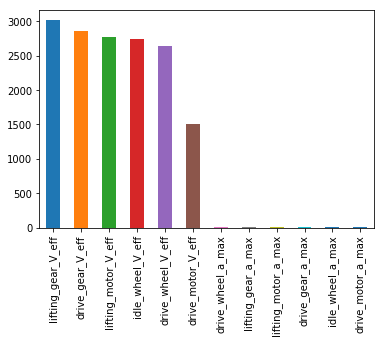

In [26]:
data.sensor_type.loc[~deltat_zero].value_counts().plot.bar()

For comparison, the number of instantaneous measurements for each sensor type

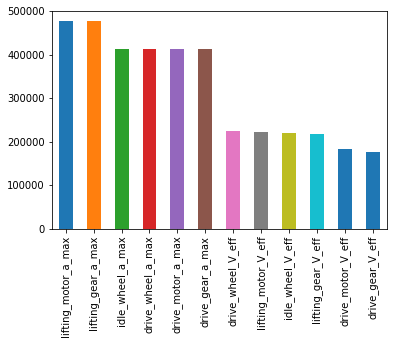

In [29]:
data.sensor_type.loc[deltat_zero].value_counts().plot.bar()

# Intraday Variation

I am interested in how the values vary throughout each day and calculate $\sigma / \mu$ for each machine, sensor, and day combination.

In [22]:
data_groups = data.loc[:, ['machine_name', 'sensor_type', 'date_measurement', 'realvalue']].groupby(
    ['machine_name', 'sensor_type', 'date_measurement'])
variation = data_groups.std() / data_groups.mean()

In [27]:
variation.iloc[8620]

realvalue    1.05737
Name: (RBG5, drive_motor_a_max, 2018-03-23 00:00:00), dtype: float64

In [39]:
data.loc[(data.machine_name == 'RBG5') & 
         (data.sensor_type == 'drive_motor_V_eff') &
         (data.date_measurement == datetime.datetime(2018, 3, 23)), :]

,machine_name,sensor_type,date_measurement,start_timestamp,end_timestamp,realvalue,unit
1996180,RBG5,drive_motor_V_eff,2018-03-23,2018-03-23 05:11:07,2018-03-23 05:11:07,0.019,mm/s
1996181,RBG5,drive_motor_V_eff,2018-03-23,2018-03-23 05:11:08,2018-03-23 05:11:13,0.018,mm/s
1996182,RBG5,drive_motor_V_eff,2018-03-23,2018-03-23 05:11:15,2018-03-23 05:11:23,0.017,mm/s
1996183,RBG5,drive_motor_V_eff,2018-03-23,2018-03-23 05:11:25,2018-03-23 05:11:25,0.016,mm/s
1996184,RBG5,drive_motor_V_eff,2018-03-23,2018-03-23 05:11:26,2018-03-23 05:11:29,0.017,mm/s
1996185,RBG5,drive_motor_V_eff,2018-03-23,2018-03-23 05:11:30,2018-03-23 05:11:40,0.016,mm/s
1996186,RBG5,drive_motor_V_eff,2018-03-23,2018-03-23 05:11:41,2018-03-23 05:11:41,0.017,mm/s
1996187,RBG5,drive_motor_V_eff,2018-03-23,2018-03-23 05:12:09,2018-03-23 05:12:09,0.019,mm/s
1996188,RBG5,drive_motor_V_eff,2018-03-23,2018-03-23 05:12:11,2018-03-23 05:12:15,0.020,mm/s
1996189,RBG5,drive_motor_V_eff,2018-03-23,2018-03-23 05:12:16,2018-03-23 05:12:22,0.021,mm/s
